In [125]:
import kmodels as kmk
import numpy as np
import pandas as pd
import os
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
os.getcwd()

'c:\\Users\\efons\\Desktop\\kalyn_lstm\\kmodels\\notebooks'

In [126]:
data_path = '../../data/'
# get all pickles
pickles = [f for f in os.listdir(data_path) if f.endswith('.pkl')]
# get the Formatted pickle
data = [f for f in pickles if 'Formatted' in f][0]
df = pd.read_pickle(data_path + data)
df

,Time,FCU,EPL,EPB,FPL,APL,FPB,OPP,Fx,Fy,Fz,ADD,Subject
0,0.000000,0.054566,0.058537,0.062743,0.155728,0.023906,0.021142,0.070465,-9.259692,-4.447818,-6.536988,0.026819,6.26_0.9_1.06
1,0.009799,0.054646,0.058400,0.062911,0.154414,0.023787,0.021018,0.077124,-9.502468,-4.600985,-6.520491,0.026349,6.26_0.9_1.06
2,0.019599,0.054800,0.057753,0.062681,0.153220,0.023763,0.021220,0.095268,-9.513043,-4.624847,-6.518658,0.026434,6.26_0.9_1.06
3,0.029398,0.056122,0.056917,0.063201,0.157919,0.023762,0.022113,0.114959,-9.409544,-4.564386,-6.497891,0.026648,6.26_0.9_1.06
4,0.039197,0.057602,0.056416,0.063981,0.163014,0.023785,0.023148,0.126942,-9.251525,-4.474644,-6.437751,0.026858,6.26_0.9_1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345171,1.950067,0.077327,0.028705,0.070763,0.186818,0.081797,0.022118,0.090759,-4.916051,-5.716611,-12.003086,0.024750,6.53_1.04_1.02
1345172,1.959866,0.077751,0.027808,0.071065,0.191791,0.082448,0.022103,0.095652,-5.248973,-5.937422,-12.067884,0.024120,6.53_1.04_1.02
1345173,1.969666,0.078584,0.027024,0.071566,0.193814,0.083229,0.022089,0.093776,-5.556444,-6.157407,-12.143441,0.023570,6.53_1.04_1.02
1345174,1.979465,0.078977,0.026315,0.071994,0.195077,0.083762,0.022077,0.086941,-5.809779,-6.380327,-12.206728,0.023072,6.53_1.04_1.02


In [127]:
xcols = df.columns
# drop "ADD", and "Subject"
xcols = list(xcols.drop(['ADD', 'Subject']))
ycols = ['Fx','Fy','Fz']
print(xcols)
print(ycols)

['Time', 'FCU', 'EPL', 'EPB', 'FPL', 'APL', 'FPB', 'OPP', 'Fx', 'Fy', 'Fz']
['Fx', 'Fy', 'Fz']


In [128]:
#random_search_results = kmk.random_search(df, batch_size=10000, n_epochs=11, n_iter=10, n_splits=5)

In [129]:
#random_search_results[1]

In [130]:
model = kmk.NN(layer_size=10, layers=5, n_inputs=len(xcols), n_outputs=len(ycols))

In [131]:
data = kmk.Dataset(df, sort_column=['Subject'])

In [132]:
X = data.X.float()
Y = data.Y.float()

# use a scaler to scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = torch.from_numpy(X).float()
X.shape

torch.Size([1345176, 8])

In [134]:
losses = kmk.run_Pytorch(model, X, Y, batch_size=len(X)-1, n_epochs=1001, learning_rate=1e-3,
                         optimizer=torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-2))


EPOCH :  0 , dt:  0.4769008159637451 seconds, losses : 194.900390625
EPOCH :  10 , dt:  4.278886556625366 seconds, losses : 193.5989227294922
EPOCH :  20 , dt:  4.571239709854126 seconds, losses : 191.96131896972656
EPOCH :  30 , dt:  5.349892854690552 seconds, losses : 189.75660705566406
EPOCH :  40 , dt:  4.5362708568573 seconds, losses : 186.56057739257812
EPOCH :  50 , dt:  4.1087048053741455 seconds, losses : 181.54855346679688
EPOCH :  60 , dt:  4.150460481643677 seconds, losses : 173.48260498046875
EPOCH :  70 , dt:  4.125542640686035 seconds, losses : 160.8152313232422
EPOCH :  80 , dt:  3.944117307662964 seconds, losses : 142.15869140625
EPOCH :  90 , dt:  3.9798285961151123 seconds, losses : 118.2671890258789
EPOCH :  100 , dt:  4.272316217422485 seconds, losses : 93.19566345214844
EPOCH :  110 , dt:  4.2053282260894775 seconds, losses : 72.47252655029297
EPOCH :  120 , dt:  5.638564586639404 seconds, losses : 58.1220588684082
EPOCH :  130 , dt:  4.75177526473999 seconds, los

OutOfMemoryError: CUDA out of memory. Tried to allocate 52.00 MiB (GPU 0; 6.00 GiB total capacity; 4.00 GiB already allocated; 0 bytes free; 5.29 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

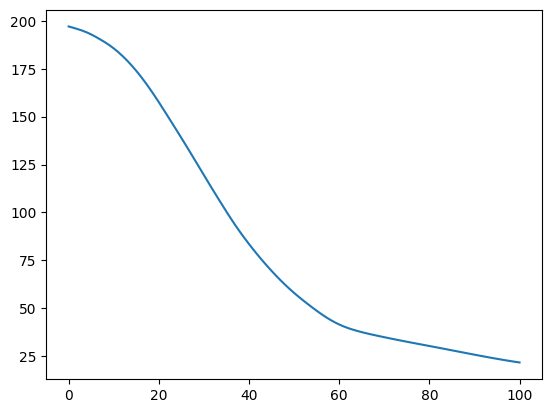

In [ ]:
plt.plot(losses)

In [ ]:
tlm = kmk.TLNN(model, X[0:2, :], change_layers=2)


In [ ]:
df2 = pd.read_pickle('../../data/SeparatedData.pkl')
df2

,Time,Event,EPB,EPL,FPL,APL,ADD,FCU,FPB,OPP,Fx,Fy,Fz,Subject
0,0.000000,0,0.609387,0.425615,0.448714,0.759052,0.686264,0.066787,0.298815,0.601626,6.628719,-5.536619,-72.106877,bXa12
1,0.016722,0,0.621460,0.430126,0.451183,0.757899,0.687901,0.066837,0.298880,0.607359,6.438037,-5.549640,-73.115967,bXa12
2,0.033445,0,0.631084,0.435097,0.453312,0.755323,0.692222,0.066811,0.298609,0.613068,6.327789,-5.691851,-74.307988,bXa12
3,0.050167,0,0.637990,0.440523,0.455069,0.751424,0.698965,0.066699,0.298155,0.618620,6.591325,-5.942138,-74.517149,bXa12
4,0.066890,0,0.642083,0.446395,0.456437,0.746356,0.707680,0.066504,0.297653,0.623865,6.722019,-6.021124,-75.056662,bXa12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4.932781,2,0.111433,0.079270,0.040960,0.024509,0.051543,0.116518,0.185874,0.143175,6.296023,-0.046129,-24.747921,zNu44
896,4.949503,2,0.105564,0.076230,0.039156,0.024097,0.051073,0.117729,0.175012,0.132562,4.910950,-0.154313,-20.377578,zNu44
897,4.966224,2,0.099609,0.073080,0.037808,0.023934,0.050917,0.116978,0.163997,0.121663,3.814453,-0.394626,-16.421894,zNu44
898,4.982945,2,0.093762,0.069941,0.036912,0.024011,0.051028,0.114628,0.153383,0.110998,2.864429,-0.684709,-13.006773,zNu44


In [ ]:
exp_data = kmk.Dataset(df2, sort_column=['Subject'])
n_subjects = len(exp_data.subjects)

test_data = exp_data.X[(n_subjects-1)*900:, :]
test_labels = exp_data.Y[(n_subjects-1)*900:, :]


train_data= exp_data.X[0:(n_subjects-1)*900, :]
train_labels = exp_data.Y[0:(n_subjects-1)*900, :]
train_data = train_data.float()
train_labels = train_labels.float()
# scale the data
train_data = train_data.detach().cpu().numpy()
train_data = scaler.transform(train_data)
train_data = torch.from_numpy(train_data).float()

In [ ]:
exp_data.X.shape

torch.Size([7200, 8])

In [ ]:
tlm_losses = kmk.run_Pytorch(tlm, train_data, train_labels, learning_rate=1e-3, 
                             batch_size=32, n_epochs=1001, 
                             optimizer=torch.optim.Adam(tlm.parameters(), lr=1e-3, weight_decay=1e-1))


EPOCH :  0 , dt:  1.7006218433380127 seconds, losses : 261.0935363769531
EPOCH :  10 , dt:  16.266148567199707 seconds, losses : 125.99663543701172
EPOCH :  20 , dt:  16.039243936538696 seconds, losses : 89.14463806152344
EPOCH :  30 , dt:  15.961235284805298 seconds, losses : 82.9539566040039


KeyboardInterrupt: 

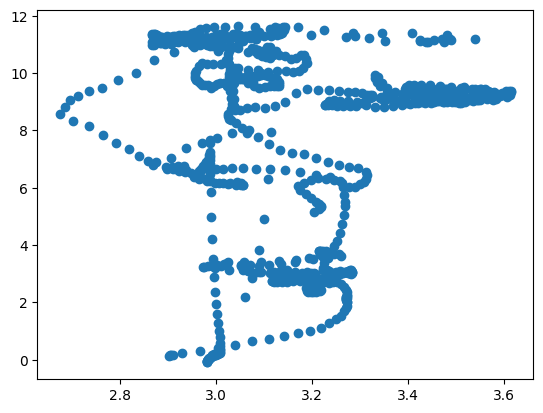

In [ ]:
# parity plot
pred = tlm(test_data.float().to('cuda'))
plt.scatter(pred.detach().cpu().numpy()[:,0], test_labels.detach().cpu().numpy()[:,0])

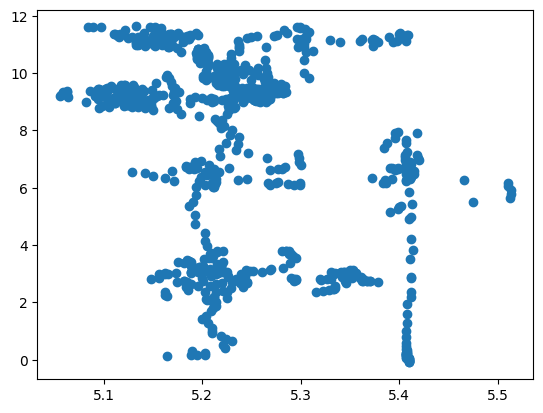

In [ ]:
# random forest for comparison
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=0, n_jobs=-1)
reg.fit(train_data.detach().cpu().numpy(), train_labels.detach().cpu().numpy())
pred = reg.predict(test_data.detach().cpu().numpy())
# parity plot
plt.scatter(pred[:,0], test_labels.detach().cpu().numpy()[:,0])

In [ ]:
# lets try a linear model
